# CONSUMO DE CERVEJA 

In [97]:
import pandas as pd
import numpy as np

In [98]:
dados = pd.read_csv('consumo_cerveja.csv', decimal=",")

dados.columns[:-1]

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana'],
      dtype='object')

### Tratando os dados

In [99]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Data                         365 non-null    object
 1   Temperatura Media (C)        365 non-null    object
 2   Temperatura Minima (C)       365 non-null    object
 3   Temperatura Maxima (C)       365 non-null    object
 4   Precipitacao (mm)            365 non-null    object
 5   Final de Semana              365 non-null    int64 
 6   Consumo de cerveja (litros)  365 non-null    object
dtypes: int64(1), object(6)
memory usage: 20.1+ KB


In [100]:
dados['Consumo de cerveja (litros)'] = dados['Consumo de cerveja (litros)'].astype(float)

In [101]:
dados.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [102]:
dados.dropna(inplace=True)

In [103]:
dados.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [104]:
dados.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [105]:
del dados['Data']

In [106]:
type(dados)

pandas.core.frame.DataFrame

In [107]:
X_dados = dados.iloc[:, [0, 1, 2, 3, 4]]
y_dados = dados.iloc[:, -1].values

#normalizando os dados

from sklearn.preprocessing import MinMaxScaler

#normaliza os dados no intervalo de 0 e 1
scaler = MinMaxScaler()
scaler.fit(X_dados)
X_dados_norm = scaler.fit_transform(X_dados)

In [108]:
df = pd.DataFrame(X_dados_norm, columns=dados.columns[:-1])

In [109]:
df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
0,0.902256,0.956835,0.818182,0.000000,0.0
1,0.884712,1.000000,0.863636,0.000000,0.0
2,0.746867,0.848921,0.700000,0.000000,1.0
3,0.694236,0.784173,0.640909,0.012658,1.0
4,0.684211,0.748201,0.627273,0.000000,0.0
...,...,...,...,...,...
360,0.695489,0.755396,0.622727,0.143460,1.0
361,0.610276,0.755396,0.554545,0.000000,0.0
362,0.550125,0.697842,0.436364,0.108650,0.0
363,0.531328,0.625899,0.359091,0.066456,0.0


In [110]:
df['target'] = y_dados

In [111]:
df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,target
0,0.902256,0.956835,0.818182,0.000000,0.0,25.461
1,0.884712,1.000000,0.863636,0.000000,0.0,28.972
2,0.746867,0.848921,0.700000,0.000000,1.0,30.814
3,0.694236,0.784173,0.640909,0.012658,1.0,29.799
4,0.684211,0.748201,0.627273,0.000000,0.0,28.900
...,...,...,...,...,...,...
360,0.695489,0.755396,0.622727,0.143460,1.0,32.307
361,0.610276,0.755396,0.554545,0.000000,0.0,26.095
362,0.550125,0.697842,0.436364,0.108650,0.0,22.309
363,0.531328,0.625899,0.359091,0.066456,0.0,20.467


#### Conhecendo os dados

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

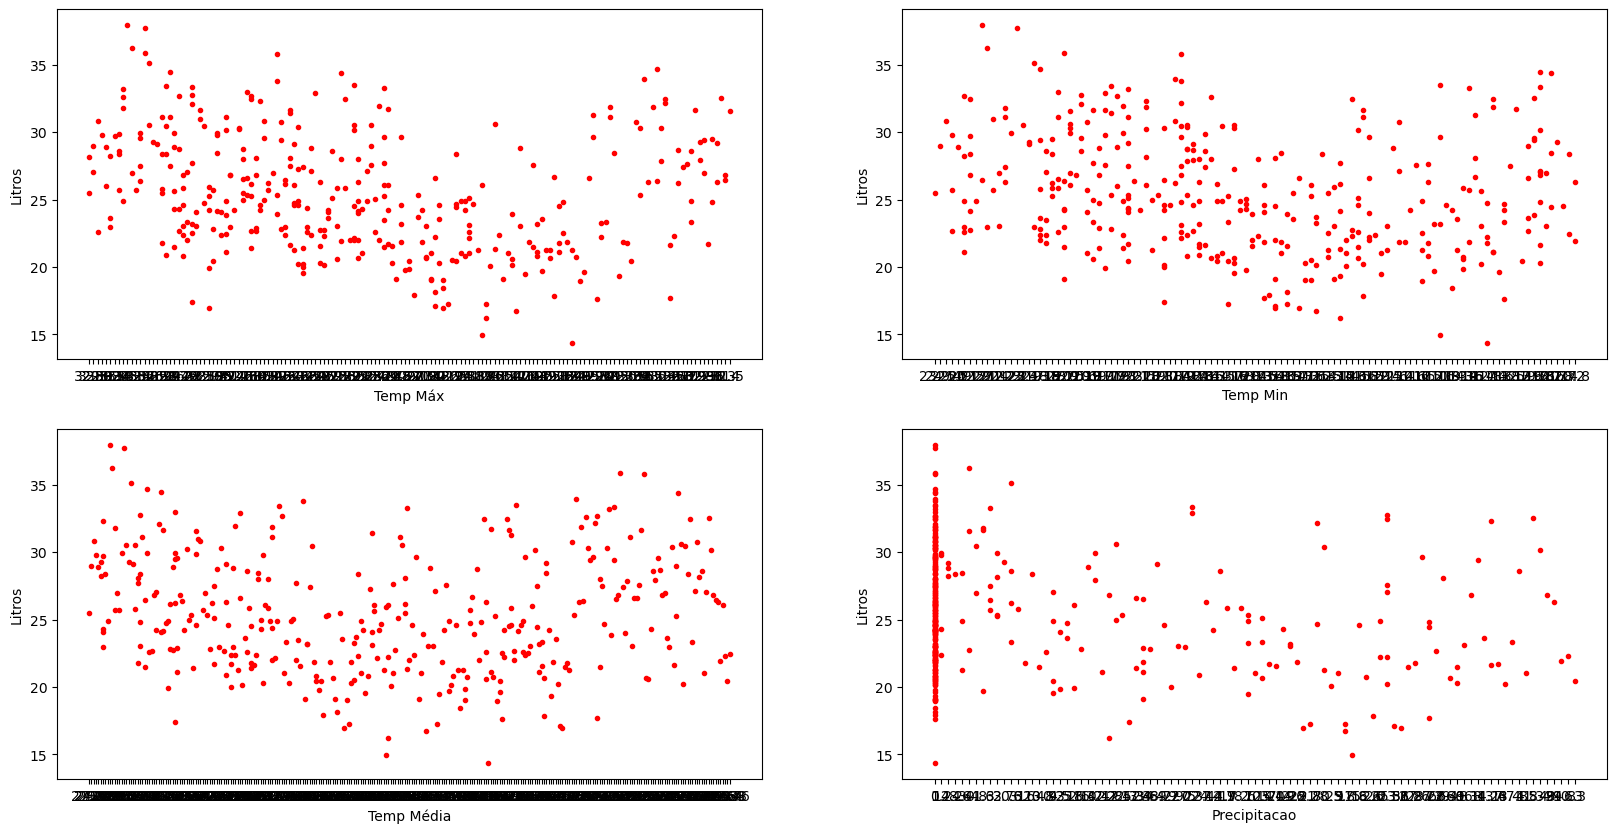

In [113]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter( 'Temperatura Maxima (C)', 'Consumo de cerveja (litros)', data=dados, marker='.', color='red', linewidth=1)

plt.xlabel("Temp Máx")
plt.ylabel("Litros")

plt.subplot(2, 2, 2)
plt.scatter( 'Temperatura Minima (C)', 'Consumo de cerveja (litros)', data=dados, marker='.', color='red', linewidth=1)
plt.xlabel("Temp Min")
plt.ylabel("Litros")

plt.subplot(2, 2, 3)
plt.scatter( 'Temperatura Media (C)', 'Consumo de cerveja (litros)', data=dados, marker='.', color='red', linewidth=1)
plt.xlabel("Temp Média")
plt.ylabel("Litros")

plt.subplot(2, 2, 4)
plt.scatter( 'Precipitacao (mm)', 'Consumo de cerveja (litros)', data=dados, marker='.', color='red', linewidth=1)
plt.xlabel("Precipitacao")
plt.ylabel("Litros")

plt.show()

##### Particionando os dados

#### Hold-out

In [114]:
from sklearn.model_selection import train_test_split
#70% treinamento 30% teste
X_train, X_test, y_train, y_test = train_test_split(X_dados_norm, y_dados, test_size=0.3, random_state=0)

In [115]:
#Modelo básico de regressão

from sklearn.linear_model import LinearRegression

In [116]:
#treinamento
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [117]:
y_predict = linear_model.predict(X_test)

In [118]:
#métricas comuns de desempenho: MSE e MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [119]:
#desempenho em teste:
print("MSE:", MSE(y_test, y_predict))
print("MAE:", MAE(y_test, y_predict))

MSE: 5.589487802905199
MAE: 2.0287862762172955


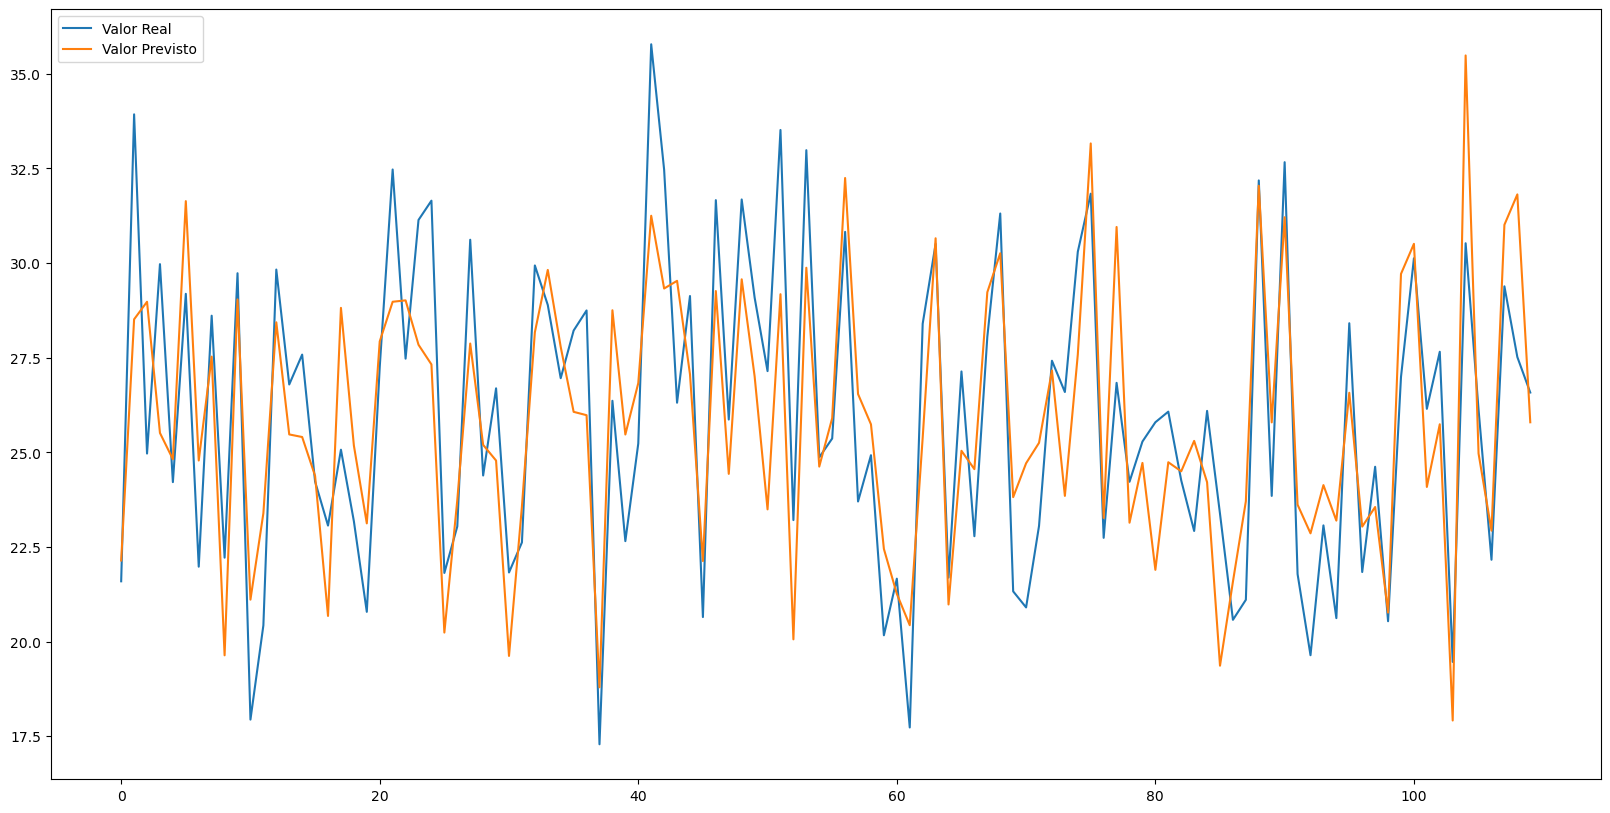

In [120]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='Valor Real')
plt.plot(y_predict, label = 'Valor Previsto')
plt.legend()
plt.show()

In [121]:
real_predict_df = pd.DataFrame({'Valor Real': y_test, 'Previsto': y_predict})
real_predict_df

,Valor Real,Previsto
0,21.593,22.142324
1,33.930,28.514732
2,24.968,28.978037
3,29.972,25.511629
4,24.213,24.818142
...,...,...
105,26.127,24.968521
106,22.162,22.929884
107,29.386,31.011938
108,27.518,31.814570


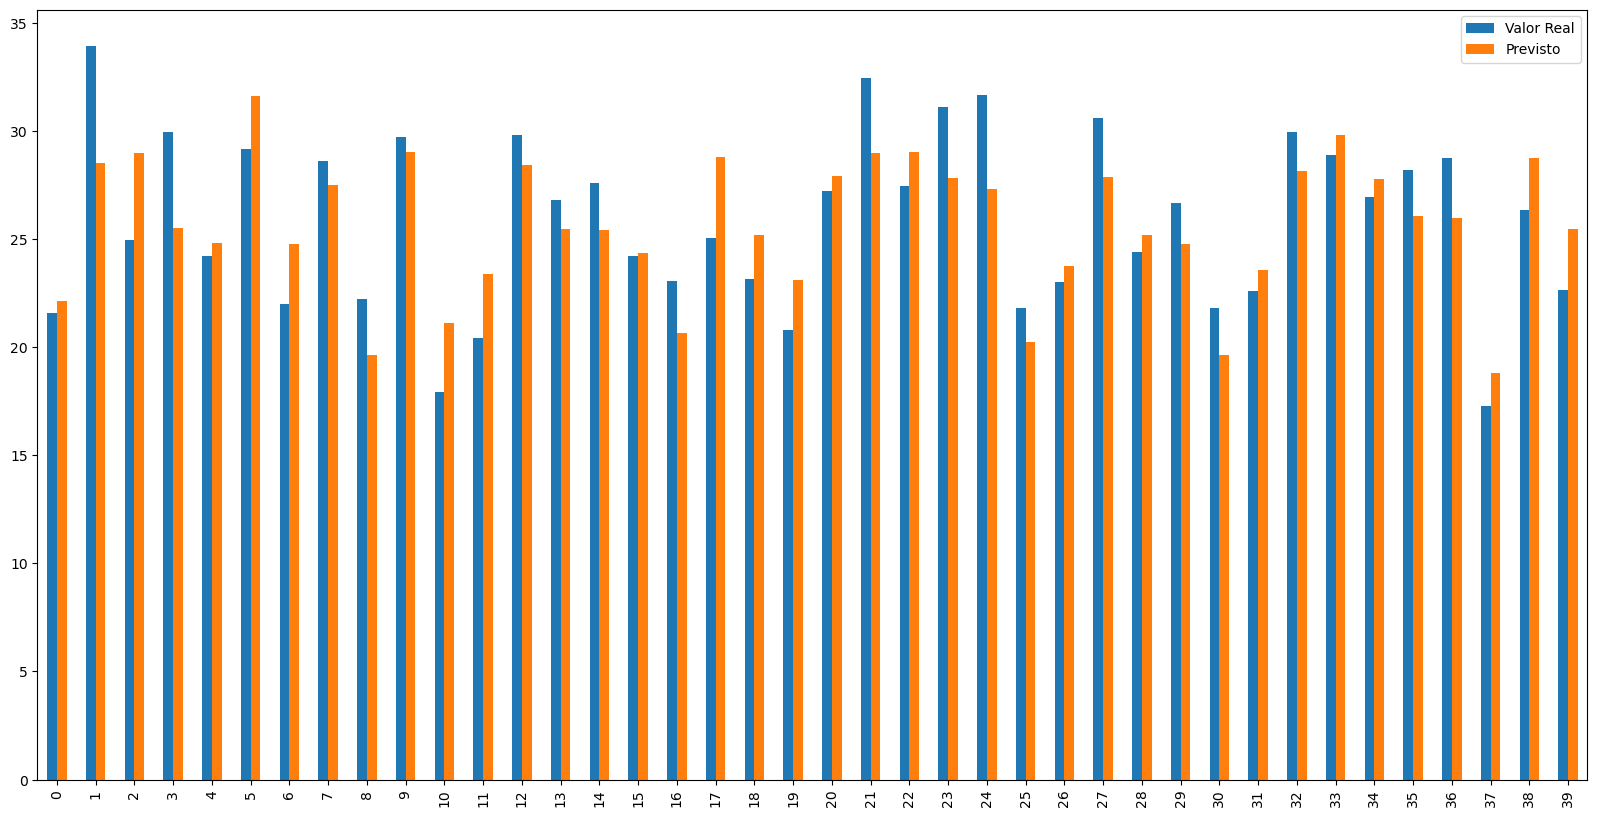

In [122]:
real_predict_df.iloc[0:40,:].plot(kind='bar',figsize=(20,10))
plt.show()

### Decision Tree Regression

In [123]:
from sklearn.tree import DecisionTreeRegressor

In [124]:
criterio = ["squared_error", "absolute_error"]  # use correct criterion names
splitter = ["best", "random"]
max_depth = [2, 3, 5]
melhor_mse = np.Inf
for c in criterio:
  for s in splitter:
    for m in max_depth:

      tree = DecisionTreeRegressor(criterion=c, splitter=s, max_depth=m)
      tree.fit(X_train, y_train)
      prev_train = tree.predict(X_train)
      mse_train = MSE(y_train, prev_train)
      if mse_train < melhor_mse:
        melhor_mse = mse_train
        melhor_modelo = tree
        print("MSE:", melhor_mse)


MSE: 9.436818895657849
MSE: 6.465680660382116
MSE: 4.094084959869676


In [125]:
tree_selected = melhor_modelo

##### KNN

In [126]:
from sklearn.neighbors import KNeighborsRegressor

In [127]:
k_values = [10, 5, 3, 2]
metric = ['minkowski', 'euclidean']
melhor_mse = np.Inf
for k in k_values:
  for m in metric:
    knn = KNeighborsRegressor(n_neighbors=k, metric=m)
    knn.fit(X_train, y_train)
    prev_train = knn.predict(X_train)
    mse_train = MSE(y_train, prev_train)
    if mse_train < melhor_mse:
      melhor_mse = mse_train
      melhor_modelo = knn
      print("MSE:", melhor_mse)


MSE: 5.619312585137254
MSE: 4.559274008000001
MSE: 4.044567320261438
MSE: 3.079579735294118


In [128]:
knn_selected = melhor_modelo

#### Teste

In [131]:
#prev_mlp = mlp_selected.predict(X_test)
prev_tree = tree_selected.predict(X_test)
#prev_knn = knn_selected.predict(X_test)
prev_linear = linear_model.predict(X_test)

In [132]:

print('Reg. Linear results:')
print("MSE:", MSE(y_test, prev_linear))
print("MAE:", MAE(y_test, prev_linear))

Reg. Linear results:
MSE: 5.589487802905199
MAE: 2.0287862762172955


In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

model = knn_selected  

pred = model.predict(X_test)

threshold = np.median(y_test)
pred_bin = (prev_tree >= threshold).astype(int)
y_test_bin = (y_test >= threshold).astype(int)
proba = pred_bin  # For ROC-AUC, use binary predictions as probabilities

acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred, zero_division=0)
rec = recall_score(y_test, pred, zero_division=0)
f1  = f1_score(y_test, pred, zero_division=0)
auc = roc_auc_score(y_test, proba)

print(f"Acurácia:  {acc:.3f}")
print(f"Precisão:  {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-Score:  {f1:.3f}")
print(f"ROC-AUC:   {auc:.3f}\n")

print("Relatório de Classificação:")
print(classification_report(y_test, pred, digits=3))

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["baixo","alto"])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, values_format="d", colorbar=False)
plt.title("Matriz de Confusão — Árvore (balanced)")
plt.show()

ValueError: continuous is not supported